In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
import pandas as pd
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input,Activation,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model

In [4]:
from tensorflow.keras import layers,models
import seaborn as sn
from sklearn.metrics import confusion_matrix , classification_report


In [5]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

digit number =  5


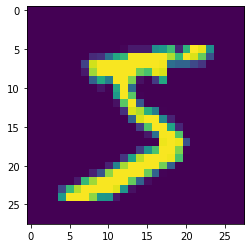

In [ ]:
plt.imshow(X_train[0])
print("digit number = " ,  y_train[0] )

In [ ]:
#X_train = X_train / 255
#X_test = X_test / 255


In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [ ]:
X_train_flattened.shape , X_test_flattened.shape


((60000, 784), (10000, 784))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.1979 - accuracy: 0.8448
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0417 - accuracy: 0.8796
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5911 - accuracy: 0.8828
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4609 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3257 - accuracy: 0.8870


In [ ]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 5.4779 - accuracy: 0.8998


[5.477860927581787, 0.8998000025749207]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([0.0000000e+00, 0.0000000e+00, 1.3817791e-30, 1.0000000e+00,
       6.5216949e-36, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0:10]  , y_test[0:10]

([3, 0, 1, 0, 2, 1, 4, 1, 4, 4],
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

1


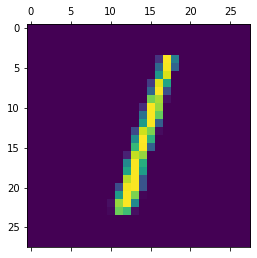

In [ ]:
print( y_predicted_labels[2] )
plt.matshow(X_test[2])

In [ ]:
#import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
#keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')

In [ ]:
# 1-hidden layer
model_2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2817 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3864 - accuracy: 0.9040
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2886 - accuracy: 0.9249
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2569 - accuracy: 0.9324
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2336 - accuracy: 0.9391


In [ ]:
model_2.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.2633 - accuracy: 0.9384


[0.2633475959300995, 0.9383999705314636]

In [ ]:
y_predicted_2 = model.predict(X_test_flattened)
y_predicted_labels_2 = [np.argmax(i) for i in y_predicted_2]

In [ ]:
'''
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

c_report = classification_report(y_test , y_predicted_labels)

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
'''


1


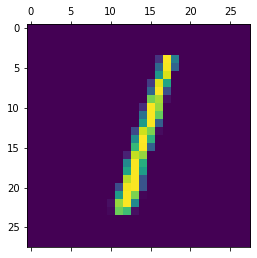

In [ ]:
print( y_predicted_labels_2[2] )
plt.matshow(X_test[2])

In [ ]:
# hidden layer with Flatten, no reshape
'''
model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100,  activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_4.fit(X_train_flattened, y_train, epochs=5)
'''



In [ ]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
#to work with callback

#Input layer
input_layer3 = Input(shape=(784),name='Input_Layer3')

initializer3 = tf.keras.initializers.he_uniform()
#Dense hidden layer
layer3_1 = Dense(400,activation='relu',kernel_initializer=initializer3)(input_layer3)
layer3_2 = Dense(200,activation='relu',kernel_initializer=initializer3)(layer3_1)
layer3_3 = Dense(50,activation='relu',kernel_initializer=initializer3)(layer3_2)
layer3_4 = Dense(20,activation='relu',kernel_initializer=initializer3)(layer3_3)
layer3_5 = Dense(10,activation='relu',kernel_initializer=initializer3)(layer3_4)
#output layer
output3 = Dense(10,activation='softmax',kernel_initializer=initializer3)(layer3_5)
#Creating a model
model3 = Model(inputs=input_layer3,outputs=output3)

#optimizer
#optimizer3 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
#optimizer = tf.keras.optimizers.Adam(0.01)

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#model3.fit(X_train,y_train,epochs=5)


In [ ]:
#model3.fit(X_train,y_train,epochs=5)
model3.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 2.4037 - accuracy: 0.1780
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 2.0656 - accuracy: 0.2079
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.8067 - accuracy: 0.2980
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6371 - accuracy: 0.3549
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 1.4742 - accuracy: 0.4378


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
#to work with callback
#model-5

input_layer5 = Input(shape=(28,28),name='Input_Layer5')

#initializer5 = tf.keras.initializers.he_uniform()
#Conv5_1 = Conv2D(filters=28,kernel_size=(3,3),strides=(1,1),padding='same',data_format='channels_last',
#              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv5_1')(input_layer5)
#Pool5_1 = MaxPool2D(pool_size=(1,1),strides=(1,1),padding='same',data_format='channels_last',name='Pool5_1')(Conv5_1)

Conv5_1 = Conv1D(filters=28,kernel_size=(3),strides=(1),padding='same',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv5_1')(input_layer5)
Pool5_1 = MaxPooling1D(pool_size=(2),strides=(1),padding='same',data_format='channels_last',name='Pool5_1')(Conv5_1)

Conv5_2 = Conv1D(filters=14,kernel_size=(3),strides=(1),padding='same',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv5_2')(Pool5_1)
Pool5_2 = MaxPooling1D(pool_size=(2),strides=(1),padding='same',data_format='channels_last',name='Pool5_2')(Conv5_2)

flatten5 = Flatten(data_format='channels_last',name='flatten5')(Pool5_2)

#layer5_1 = Dense(56,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform() )(flatten5)
#layer5_1 = Dense(units=28,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=28),name='layer5_1')(flatten5)
layer5_1 = Dense(units=40,activation='relu' )(flatten5)

output5 = Dense(10,activation='softmax' )(layer5_1)

model5 = Model(inputs=input_layer5,outputs=output5)

#optimizer
#optimizer3 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
#optimizer = tf.keras.optimizers.Adam(0.01)

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#model3.fit(X_train,y_train,epochs=5)
model5.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer5 (InputLayer)   [(None, 28, 28)]          0         
                                                                 
 Conv5_1 (Conv1D)            (None, 28, 28)            2380      
                                                                 
 Pool5_1 (MaxPooling1D)      (None, 28, 28)            0         
                                                                 
 Conv5_2 (Conv1D)            (None, 28, 14)            1190      
                                                                 
 Pool5_2 (MaxPooling1D)      (None, 28, 14)            0         
                                                                 
 flatten5 (Flatten)          (None, 392)               0         
                                                                 
 dense_10 (Dense)            (None, 40)                1572

In [9]:
#model5.summary()

In [16]:
model5.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7902 - accuracy: 0.6460
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3704 - accuracy: 0.9057
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2086 - accuracy: 0.9432
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1592 - accuracy: 0.9560
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1263 - accuracy: 0.9646


In [17]:
y_predicted_5 = model5.predict(X_test)
y_predicted_labels_5 = [np.argmax(i) for i in y_predicted_5]

In [20]:
y_test[0:5], y_predicted_labels_5[0:5]

(array([7, 2, 1, 0, 4], dtype=uint8), [7, 2, 1, 0, 4])

Text(69.0, 0.5, 'Truth')

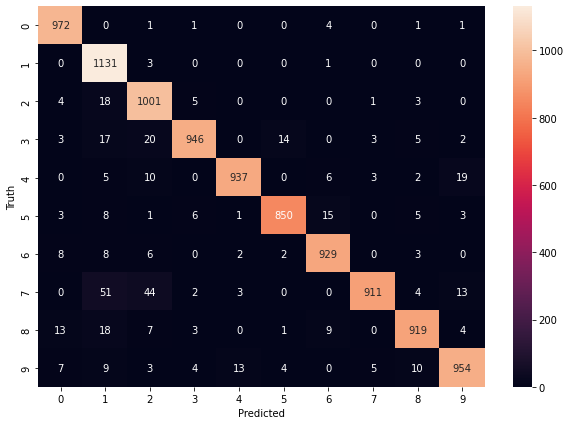

In [18]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_5)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [19]:
print("Classification Report: \n", classification_report(y_test, y_predicted_labels_5 ))


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.89      1.00      0.94      1135
           2       0.91      0.97      0.94      1032
           3       0.98      0.94      0.96      1010
           4       0.98      0.95      0.97       982
           5       0.98      0.95      0.96       892
           6       0.96      0.97      0.97       958
           7       0.99      0.89      0.93      1028
           8       0.97      0.94      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.95     10000
   macro avg       0.96      0.95      0.96     10000
weighted avg       0.96      0.95      0.96     10000



In [67]:
cnn = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(28,28)),
    layers.MaxPooling1D((2)),
    
    layers.Conv1D(filters=64, kernel_size=(3), activation='relu'),
    layers.MaxPooling1D((2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [68]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 26, 32)            2720      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 11, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 320)               0         
                                                                 
 dense_42 (Dense)            (None, 64)               

In [69]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4026 - accuracy: 0.8743
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1926 - accuracy: 0.9499
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1293 - accuracy: 0.9626
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1032 - accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0871 - accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0765 - accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0671 - accuracy: 0.9797
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0591 - accuracy: 0.9823
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0564 - accuracy: 0.9838
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0